In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [7]:
df.head()
df.shape
df.describe

<bound method NDFrame.describe of         기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0       2017        1     1           13    46      170.0        65.0  91.0   
1       2017        2     2            8    41      150.0        45.0  73.4   
2       2017        3     1            8    45      175.0        75.0  94.0   
3       2017        4     2           12    11      155.0        55.0  67.5   
4       2017        5     1            8    41      175.0        75.0  93.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력

📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [8]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [13]:
df["연령대"] = df["연령대코드(5세단위)"].map(age_code)
df
df.groupby(["연령대"])["허리둘레"].describe().reset_index()

,연령대,count,mean,std,min,25%,50%,75%,max
0,20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
1,25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
2,30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
3,35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
4,40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
5,45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
6,50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
7,55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
8,60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0
9,65~69세,53624.0,83.588500,8.443542,50.0,78.0,83.5,89.0,129.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [18]:
df_Correlation = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df_Correlation

,음주여부,흡연상태,연령대코드(5세단위),성별코드
0,0.0,3.0,13,1
1,0.0,1.0,8,2
2,0.0,1.0,8,1
3,1.0,1.0,12,2
4,0.0,3.0,8,1
...,...,...,...,...
999995,1.0,1.0,9,2
999996,0.0,1.0,9,2
999997,0.0,1.0,12,2
999998,1.0,2.0,11,1


In [21]:
df_Correlation_cr = df_Correlation.corr()
df_Correlation_cr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


In [23]:
import matplotlib.pyplot as plt

<Axes: >

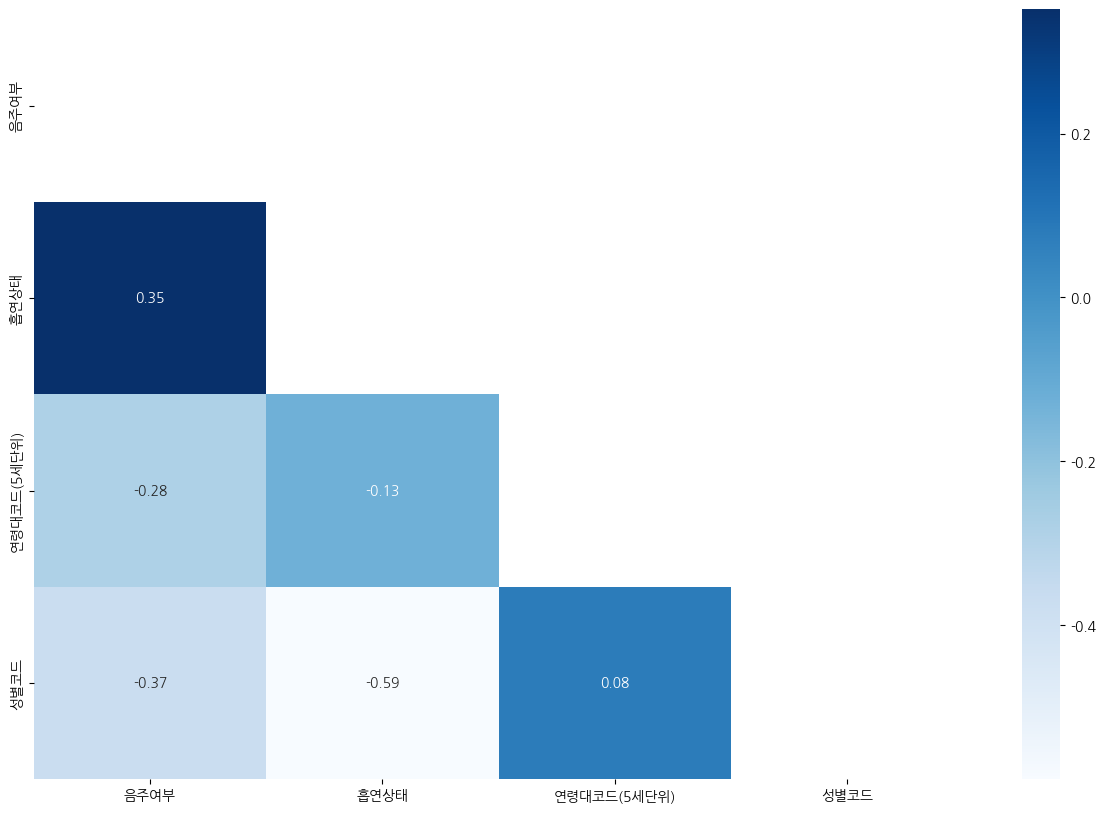

In [32]:
mask = np.triu(np.ones_like(df_Correlation_cr, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df_Correlation_cr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [41]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

In [42]:
df["흡연"] = df["흡연상태"].map(smoke)
df["음주"] = df["음주여부"].map(drink)

In [43]:
df_cross = pd.crosstab(df['음주'], df['흡연'])
df_cross

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


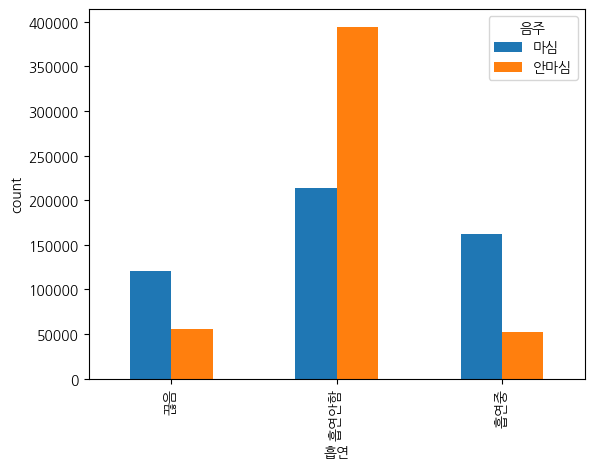

In [46]:
df_cross.T.plot.bar(stacked=False)
plt.ylabel('count')
plt.show()

In [52]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [56]:
df_Sort_Person = df[df["체중(5Kg 단위)"] >= 120]
df_Sort_Person.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
1219,2017,1220,2,6,41,170.0,120.0,116.0,0.7,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,25~29세,흡연중,안마심
2309,2017,2310,1,6,30,190.0,155.0,127.0,0.8,0.9,...,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세,흡연중,안마심
3497,2017,3498,1,7,46,175.0,120.0,119.0,1.2,1.2,...,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세,흡연중,마심
3685,2017,3686,1,7,30,180.0,140.0,127.0,1.5,1.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,30~34세,끊음,안마심
5788,2017,5789,1,8,41,175.0,140.0,124.0,1.0,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연안함,안마심


/Users/hyunmyeong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

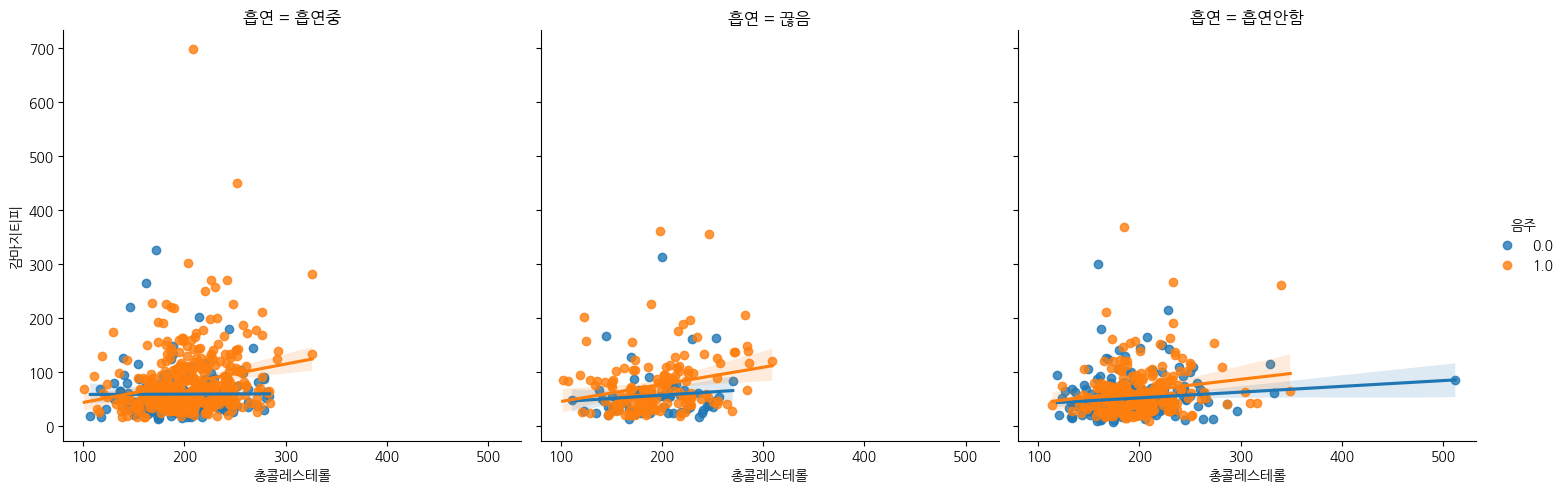

In [59]:
plt.figure(figsize=(20,8))
p = sns.lmplot(data=df_Sort_Person, x='총콜레스테롤', y='감마지티피', hue='음주여부', col='흡연상태', col_order=[3.0, 2.0, 1.0])

p._legend.set_title('음주')

col_title = ['흡연중', '끊음', '흡연안함']
for i in range(3):
  p.fig.axes[i].set_title('흡연 = ' + col_title[i])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [63]:
df_Eyes = df[(df["시력(좌)"] != 9.9) & (df["시력(우)"] != 9.9)]
eyes_Avg = df_Eyes.groupby(["연령대", "성별코드"])[["시력(좌)", "시력(우)"]].mean().reset_index()

<Axes: xlabel='시력(우)', ylabel='연령대'>

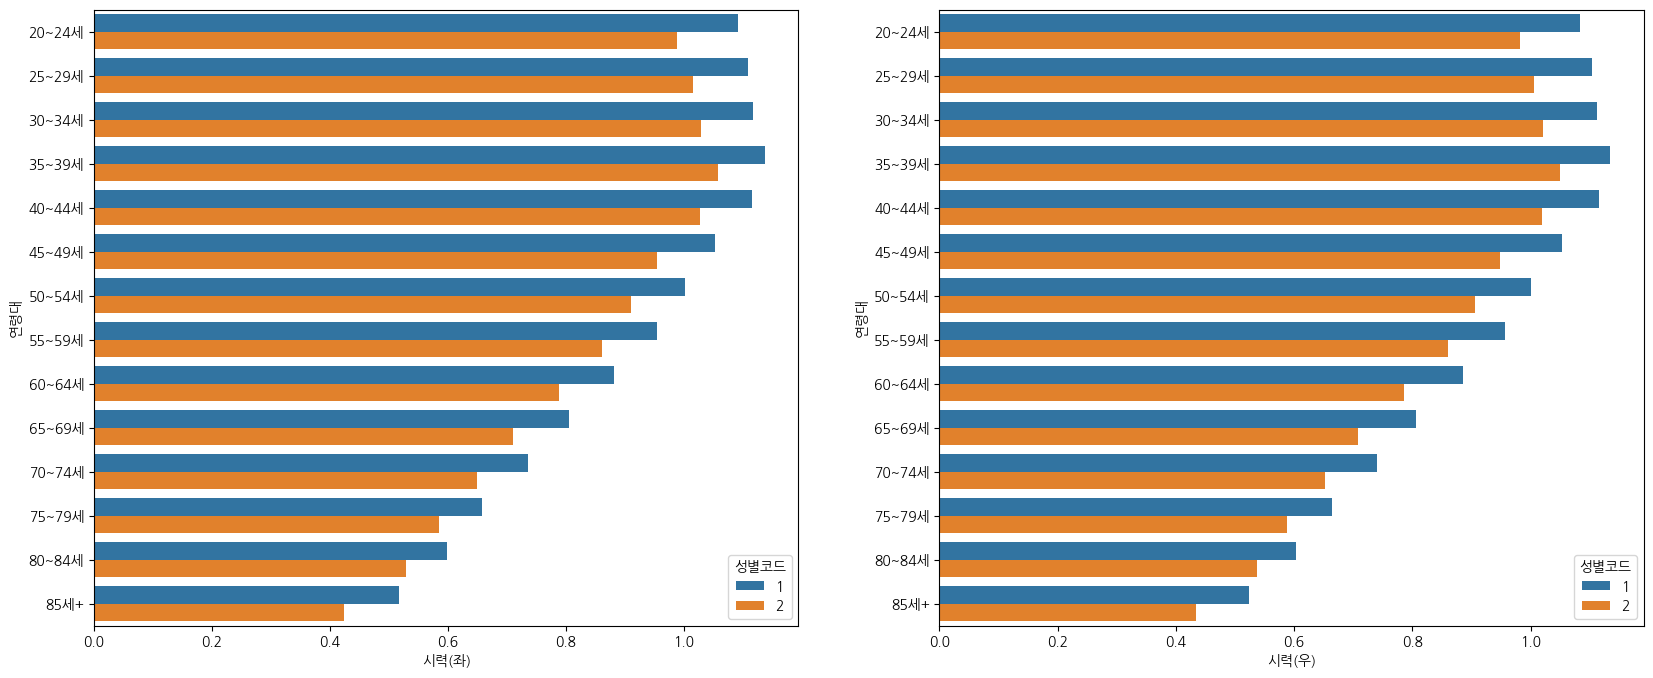

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 왼쪽: 시력(좌)
sns.barplot(data = eyes_Avg, y = "연령대", x = "시력(좌)", hue = "성별코드",
            ax = axes[0], orient="h")
# 오른쪽: 시력(우)
sns.barplot(data = eyes_Avg, y = "연령대", x = "시력(우)", hue = "성별코드",
            ax=axes[1], orient="h")